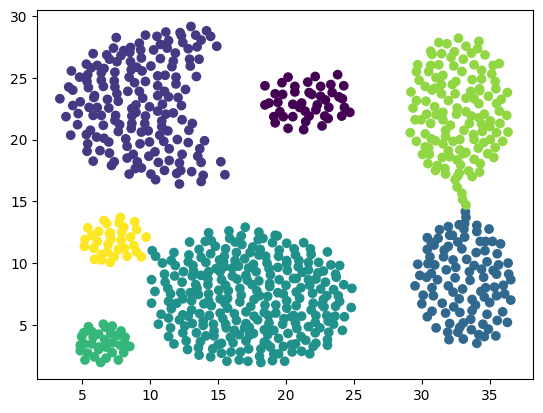

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'D:\Desktop\Big Data\Analisi per Big Data (2°Modulo)\Esercitazioni\Aggregation.txt'
dataset = pd.read_csv(file_path, sep="\t")

#assegnare nomi alle feature
dataset.columns =  ["feature1", "feature2", "class"]

X = dataset.drop("class", axis=1)
y = dataset["class"]

plt.scatter(X["feature1"], X["feature2"], c=y)
plt.show()

    Ricercare gli outlier utilizzando il metodo Local Outlier Factor (LOF) e stabilire
    autonomamente il numero di vicini da considerare nell’intorno di ogni punto,
    testando almeno tre valori di k.

In [12]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

k_value = [2, 3, 4]

for i, k in enumerate(k_value):
    lof = LocalOutlierFactor(n_neighbors = k)

    y_label_lof = lof.fit_predict(X)
    
    outliers_index = np.where(y_label_lof == -1)[0]
    n_outliers = len(outliers_index)

    print(f"numero outlier= {n_outliers}\noutliers\n {X.iloc[outliers_index]}")

    

    

numero outlier= 3
outliers
     feature1  feature2
35       7.5     28.25
61       5.8     26.95
68       4.2     25.55
numero outlier= 1
outliers
     feature1  feature2
35       7.5     28.25
numero outlier= 0
outliers
 Empty DataFrame
Columns: [feature1, feature2]
Index: []


Eseguire il clustering con l’algoritmo DBSCAN testando almeno tre diverse
combinazioni di coppie {Eps, MinPoints}.

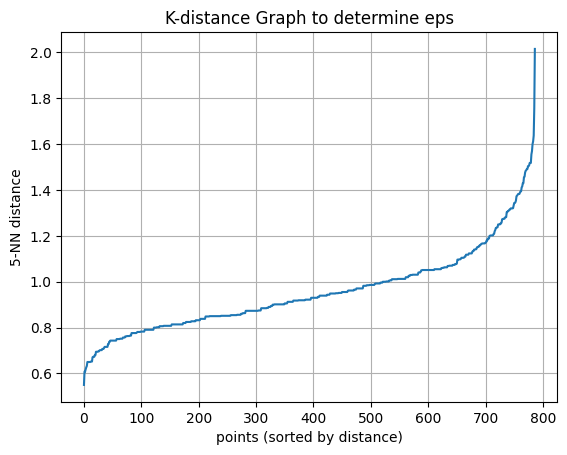

In [13]:
#SCELTA DI EPS PER MIN POINT == 5
from sklearn.neighbors import NearestNeighbors


min_point = 5

#calcolo le distanze dei k-nearest vicini
neightbors = NearestNeighbors(n_neighbors= min_point)
neightbors_fit = neightbors.fit(X)
distances, indices = neightbors_fit.kneighbors(X) #distances ==> matrice n x 5 contenente tutte le distanze dai vari punti

#Ordinare le distanze del K-nearst
distances = np.sort(distances[:,-1]) #prendiamo in considerazione solo il punto più lontano(ultima colonna)

plt.plot(distances)
plt.xlabel("points (sorted by distance)")
plt.ylabel(f'{min_point}-NN distance')
plt.title('K-distance Graph to determine eps')
plt.grid(True) 
plt.show()  

#tecnica del ginocchio
#dal grafico capiamo che un buon valore di EPS è 1.2 - 1.3


stampa 0
numero clusters: 7


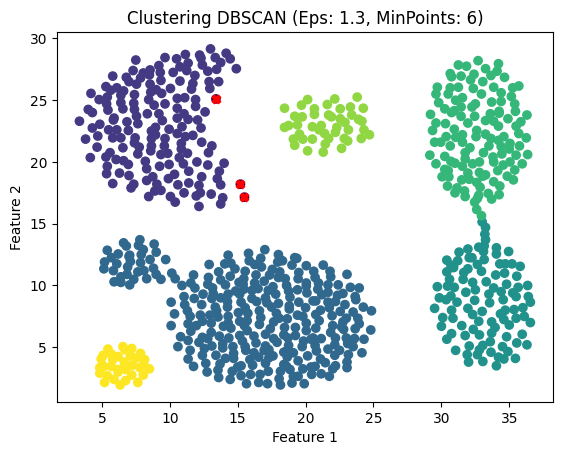

stampa 1
numero clusters: 6


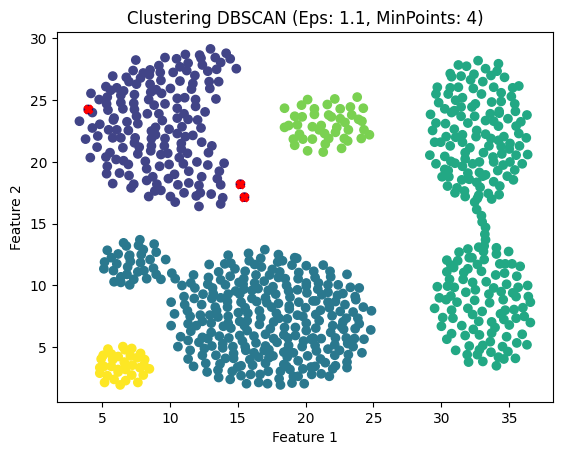

stampa 2
numero clusters: 7


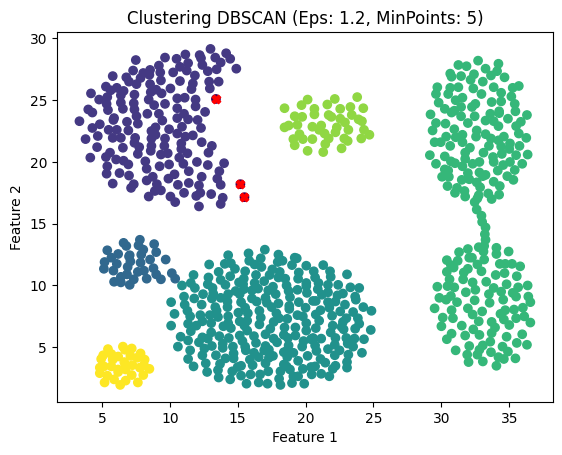

In [14]:
from sklearn.cluster import DBSCAN

parameters= [ {"eps": 1.3, "min_point" : 6},
              {"eps": 1.1, "min_point" : 4},
              {"eps": 1.2, "min_point" : 5},
              ]

for i, params in enumerate(parameters):
    db_scan = DBSCAN(eps=params["eps"], min_samples= params["min_point"])

    y_label_db = db_scan.fit_predict(X)

    outliers_index = np.where(y_label_db == -1)[0]
    n_outliers = len(outliers_index)

    print(f"stampa {i}")
    #print(f"outliers: {n_outliers}")
    #print(X.iloc[outliers_index] )

    n_clusters = len(np.unique(y_label_db))
    print(f"numero clusters: {n_clusters}")

    # Plot dei cluster
    plt.figure()
    plt.scatter(X["feature1"], X["feature2"], c=y_label_db, marker='o')
    plt.scatter(X.iloc[outliers_index, 0], X.iloc[outliers_index, 1],  marker='X',c = "red")

    plt.title(f"Clustering DBSCAN (Eps: {params['eps']}, MinPoints: {params['min_point']})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Implementare una routine routine di clustering probabilistico con approccio
EM, usando una mistura di 7 distribuzioni gaussiane bivariate in cui i valori
iniziali dei prior siano tutti pari a 𝛼! = "

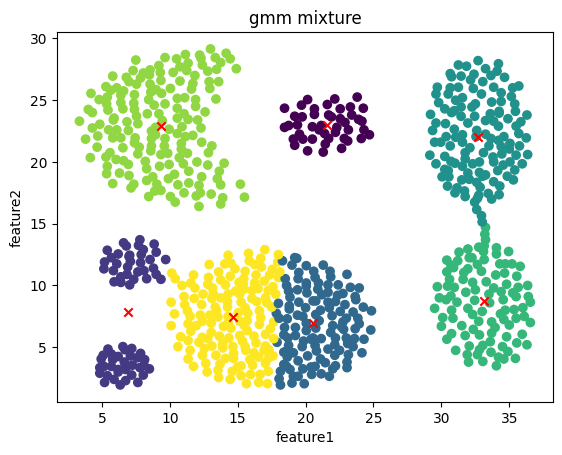

In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 7,
                     weights_init= np.full(7, 1/7))

y_label_gmm = gmm.fit_predict(X)

n_clusters = len(np.unique(y_label_gmm))

means = gmm.means_

plt.figure()
plt.scatter(X["feature1"], X["feature2"], c= y_label_gmm)

plt.scatter(means[:, 0], means[:, 1], marker= "x",c= "red")

plt.title("gmm mixture")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()





Determinare e mostrare la matrice di confusione di tutti gli algoritmi di
clustering implementati (tutti i tentativi DBSCAN e il clustering probabilistico)
calcolando i relativi indici di Gini.

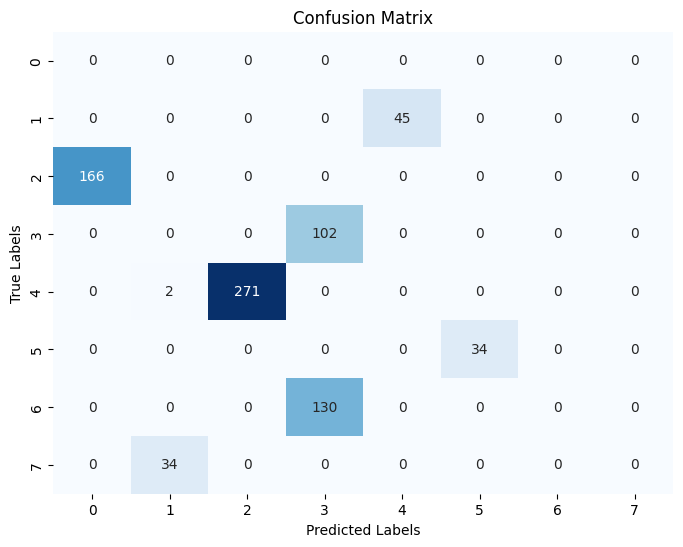

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Filtra i punti con etichetta -1 (rumore) dalle etichette predette e reali
mask = y_label_db != -1  # True per i punti non considerati rumore
y_true_filtered = y[mask]        # Etichette vere senza i punti con etichetta -1
y_pred_filtered = y_label_db[mask]  # Etichette predette senza i punti con etichetta -1

#db scan
confusion_matrix_dbscan = confusion_matrix(y_true=y_true_filtered, y_pred= y_pred_filtered)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dbscan, annot=True, fmt='d', cmap='Blues', cbar=False)

# Aggiungi etichette e titolo al grafico
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


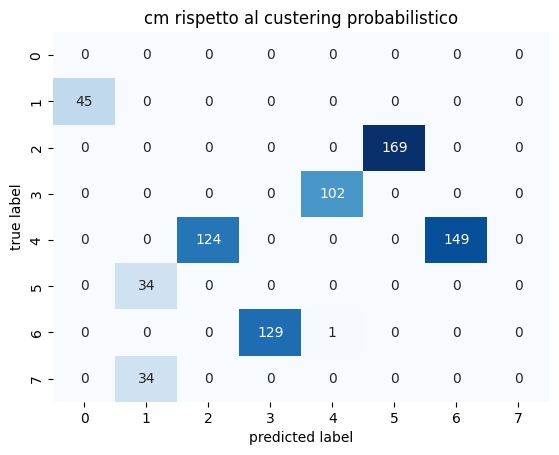

In [17]:
#confusion matrix rispetto al clustering probabilistico

confusion_matrix_gmm = confusion_matrix(y_true= y, y_pred=y_label_gmm)

plt.figure()
sns.heatmap(confusion_matrix_gmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.title("cm rispetto al custering probabilistico")
plt.show()

In [18]:
from collections import Counter
# Funzione per calcolare l'indice di Gini per un singolo cluster
def gini_index(true_labels):
    label_counts = Counter(true_labels)

    total_points = len(true_labels)
    
    if total_points == 0:  # Evita divisioni per zero
        return 0
    
    gini = 1.0 - sum((count / total_points) ** 2 for count in label_counts.values())
    return gini

#########################################################################################################
#########################################################################################################

# Filtriamo i punti non rumore
mask = y_label_db != -1  # True per i punti non rumore
y_true_filtered = y[mask]        
y_pred_filtered = y_label_db[mask]  

# Trova i cluster unici (escludendo il rumore -1)
unique_clusters = np.unique(y_pred_filtered)

# Calcolo dell'indice di Gini per ciascun cluster
gini_indices = []

for cluster in unique_clusters:
    if cluster != -1:  # Escludiamo il cluster rumore
        # Maschera per selezionare i punti del cluster
        cluster_mask = y_pred_filtered == cluster
        true_labels_in_cluster = y_true_filtered[cluster_mask]
            
        # Calcola l'indice di Gini per questo cluster
        gini = gini_index(true_labels_in_cluster)
        gini_indices.append(gini)
    
# Calcola la media degli indici di Gini per tutti i cluster
average_gini = np.mean(gini_indices)
print(f" Indice di Gini medio = {gini_indices}")
print(f" Indice di Gini medio = {average_gini:.4f}")

 Indice di Gini medio = [0.0, 0.1049382716049383, 0.0, 0.49271700356718195, 0.0, 0.0]
 Indice di Gini medio = 0.0996


In [19]:
#gini per clustering probabilistico

from collections import Counter
# Funzione per calcolare l'indice di Gini per un singolo cluster
def gini_index(true_labels):
    label_counts = Counter(true_labels)

    total_points = len(true_labels)
    
    if total_points == 0:  # Evita divisioni per zero
        return 0
    
    gini = 1.0 - sum((count / total_points) ** 2 for count in label_counts.values())
    return gini

#########################################################################################################
#########################################################################################################

# Filtriamo i punti non rumore
mask = y_label_gmm != -1  # True per i punti non rumore
y_true_filtered = y[mask]        
y_pred_filtered = y_label_gmm[mask]  

# Trova i cluster unici (escludendo il rumore -1)
unique_clusters = np.unique(y_pred_filtered)

# Calcolo dell'indice di Gini per ciascun cluster
gini_indices = []

for cluster in unique_clusters:
    if cluster != -1:  # Escludiamo il cluster rumore
        # Maschera per selezionare i punti del cluster
        cluster_mask = y_pred_filtered == cluster
        true_labels_in_cluster = y_true_filtered[cluster_mask]
            
        # Calcola l'indice di Gini per questo cluster
        gini = gini_index(true_labels_in_cluster)
        gini_indices.append(gini)
    
# Calcola la media degli indici di Gini per tutti i cluster
average_gini = np.mean(gini_indices)
print(f" Indice di Gini medio = {gini_indices}")
print(f" Indice di Gini medio = {average_gini:.4f}")

 Indice di Gini medio = [0.0, 0.5, 0.0, 0.0, 0.019228956546328613, 0.0, 0.0]
 Indice di Gini medio = 0.0742
